## > **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li
    
<li><a href="#conclusions">Conclusions</a></li>
## Introduction
For this Data Analyst project, I selected the TMDb movie dataset from kaggle to investigate. According to kaggle introduction page, the data contains information that are provided from The Movie Database (TMDb). It collects 5000+ movies and their rating and basic move information, including user ratings and revenue data.</ul>

## Research Part 1
 The Key that Affect of the Success  Movie?
   •	Question 1: Is there any association between the budget and vote average ?
   •	Question 2: Is the cast are affected in vote average ?
   •	Question 3: What the director , genres , keyword are associated with average vote ?

## Research Part 2
 Evaluating the  Movie base on release_date , runtime , revenue
   •	Question 1: Is there any association between runtime and revenue ?
   •	Question 2: Is there any association between release year and runtime ?
   •	Question 3: Is there any association between release year and revenue?




<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
% matplotlib inline

UsageError: Line magic function `%` not found.


In [173]:
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [174]:
df.shape

(10866, 21)

In [175]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [177]:
df_budget_zero = df.groupby('budget').count()['id']
df_budget_zero.head(4)                                      #filterring budget zero

budget
0    5696
1       4
2       1
3       3
Name: id, dtype: int64

In [178]:
df_runtime_zero = df.groupby('runtime').count()['id']
df_runtime_zero.head(4)                                     #count zero value in runtime

runtime
0    31
2     5
3    11
4    17
Name: id, dtype: int64

In [179]:
df_revenue_zero = df.groupby('revenue').count()['id']
df_revenue_zero.head(4)                                 #count zero value in revenue

revenue
0    6016
2       2
3       3
5       2
Name: id, dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [180]:
col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(col, axis=1, inplace=True)        #drop unsseray coulmn

In [181]:
df.head(4)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015


In [182]:
df.drop_duplicates(inplace=True)          #drop duplicates

In [183]:
df.head(4)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015


In [184]:
indexNames = df[ df['budget'] == 0 ].index
df.drop(indexNames , inplace=True)         #get the name of index which column budget have zero


In [185]:
df.head(4)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015


In [186]:
indexNames = df[df['revenue'] == 0 ].index
df.drop(indexNames , inplace=True)             #get the name of index which column revenue have zero

In [187]:
df.head(4)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015


In [188]:
modifayNull=['cast', 'director', 'genres']
df.dropna(subset = modifayNull, how='all', inplace=True)               #drop null value

In [189]:
df.isnull().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      4
director                  1
keywords                138
runtime                   0
genres                    0
production_companies     46
release_date              0
vote_count                0
vote_average              0
release_year              0
dtype: int64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
keywords                3716 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 376.4+ KB


In [191]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( The Key that Affect of the Success  Movie)

In [212]:
def cut_into_quantile(dfname ,column_name):   # funcation of quantile
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

In [213]:
def find_top(dataframe_col, num=3):
    alist = dataframe_col.str.cat(sep='|').split('|')
    new = pd.DataFrame({'top' :alist})
    top = new['top'].value_counts().head(num)
    return top

In [194]:
# question one , is there any association between the budget and vote average ?
df = cut_into_quantile(df,'budget')
df.head(4)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,High
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,High
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,High


In [195]:
result_mean = df.groupby('budget_levels')['vote_average'].mean()
result_mean

budget_levels
Low                6.244126
Medium             6.155061
Moderately High    6.089941
High               6.181096
Name: vote_average, dtype: float64

In [196]:
result_median = df.groupby('budget_levels')['vote_average'].median()
result_median

budget_levels
Low                6.3
Medium             6.2
Moderately High    6.1
High               6.2
Name: vote_average, dtype: float64

In [214]:
intt = np.arange(len(result_mean))  
width = 0.5       
intt

array([0, 1, 2, 3])

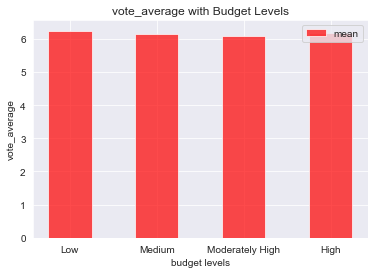

In [215]:
sns.set_style('darkgrid')
bars = plt.bar(intt, result_mean, width, color='r', alpha=.7, label='mean')
plt.ylabel('vote_average')
plt.xlabel('budget levels')
plt.title('vote_average with Budget Levels')
locations = ind 
labels = result_median.index  
plt.xticks(locations, labels)
plt.legend()

In [218]:
# question two , is the cast are affected in vote average ?
df_vote = pd.DataFrame({'vote_avarge_cast': a.index, 'vote_vote_average': b.index})
df_vote

,vote_avarge_cast,vote_vote_average
0,Robert De Niro,Steven Spielberg
1,Bruce Willis,Clint Eastwood
2,Samuel L. Jackson,Ridley Scott


In [219]:
df_vote.head(4)

,vote_avarge_cast,vote_vote_average
0,Robert De Niro,Steven Spielberg
1,Bruce Willis,Clint Eastwood
2,Samuel L. Jackson,Ridley Scott


In [220]:
df['cast'].value_counts()[:10]  #count the value of cast

William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei             5
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    3
Sylvester Stallone|Talia Shire|Burt Young|Carl Weathers|Burgess Meredith            3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    3
Martin Freeman|Ian McKellen|Richard Armitage|Ken Stott|Graham McTavish              2
Patrick Stewart|Hugh Jackman|Ian McKellen|Halle Berry|Famke Janssen                 2
Kristen Stewart|Robert Pattinson|Taylor Lautner|Ashley Greene|Peter Facinelli       2
Kurt Russell|ZoÃ« Bell|Rosario Dawson|Vanessa Ferlito|Sydney Tamiia Poitier         2
Ioan Gruffudd|Jessica Alba|Chris Evans|Michael Chiklis|Julian McMahon               2
Bill Murray|Dan Aykroyd|Sigourney Weaver|Harold Ramis|Rick Moranis                  2
Name: cast, dtype: int64

In [221]:
df['cast'].value_counts().max()

5

In [222]:
df['cast'].value_counts().min()

1

In [223]:
df['cast'].value_counts().mean()

1.0054844606946984

In [224]:
df['cast'].value_counts().median()

1.0

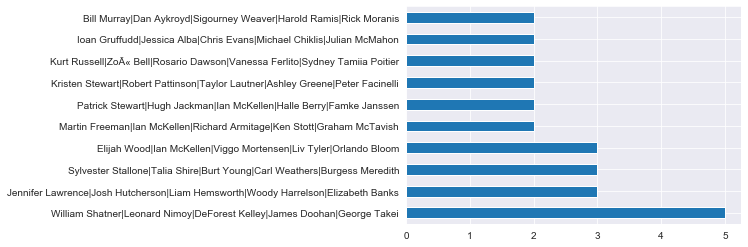

In [225]:
df['cast'].value_counts()[:10].plot(kind='barh')


In [226]:
df.groupby(['vote_average' , 'cast']).max()[:5]

budget  \
vote_average cast                                                           
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  65000000   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...  25000000   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...  40000000   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...   5600000   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...   7000000   

                                                                                      director  \
vote_average cast                                                                                
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...              Lawrence Kasanoff   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...  Jason Friedberg|Aaron Seltzer   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...                 William Malone   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...                  Dario Argento   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...                       Uwe Boll   

                                                                                         genres  \
vote_average cast                                                                                 
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  Animation|Action|Comedy|Family   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...                   Action|Comedy   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...                 Horror|Thriller   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...         Horror|Romance|Thriller   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...          Horror|Action|Thriller   

                                                                     id  \
vote_average cast                                                         
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  116977   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...   13805   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...    9544   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...  135812   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...   11059   

                                                                                                          keywords  \
vote_average cast                                                                                                    
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  supermarket|fight|product placement|computer a...   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...  natural disaster|violence|mortal danger|during...   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...   race against time|psychopath|homepage|cop|doctor   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...            dracula|gothic horror|evil|bite mark|3d   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...     island|rave|weapon|student|based on video game   

                                                                    original_title  \
vote_average cast                                                                    
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...         Foodfight!   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...     Disaster Movie   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...         FearDotCom   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...         Dracula 3D   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...  House of the Dead   

                                                                 popularity  \
vote_average cast                                                             
2.2          Charlie Sheen|Wayne

In [227]:
df.groupby(['vote_average' , 'cast']).min()[:5]

budget  \
vote_average cast                                                           
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  65000000   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...  25000000   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...  40000000   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...   5600000   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...   7000000   

                                                                                      director  \
vote_average cast                                                                                
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...              Lawrence Kasanoff   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...  Jason Friedberg|Aaron Seltzer   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...                 William Malone   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...                  Dario Argento   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...                       Uwe Boll   

                                                                                         genres  \
vote_average cast                                                                                 
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  Animation|Action|Comedy|Family   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...                   Action|Comedy   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...                 Horror|Thriller   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...         Horror|Romance|Thriller   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...          Horror|Action|Thriller   

                                                                     id  \
vote_average cast                                                         
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  116977   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...   13805   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...    9544   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...  135812   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...   11059   

                                                                                                          keywords  \
vote_average cast                                                                                                    
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  supermarket|fight|product placement|computer a...   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...  natural disaster|violence|mortal danger|during...   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...   race against time|psychopath|homepage|cop|doctor   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...            dracula|gothic horror|evil|bite mark|3d   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...     island|rave|weapon|student|based on video game   

                                                                    original_title  \
vote_average cast                                                                    
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...         Foodfight!   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...     Disaster Movie   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...         FearDotCom   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...         Dracula 3D   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...  House of the Dead   

                                                                 popularity  \
vote_average cast                                                             
2.2          Charlie Sheen|Wayne

In [228]:
df.groupby(['vote_average' , 'cast']).mean()[:5]

id  \
vote_average cast                                                           
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  116977.0   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...   13805.0   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...    9544.0   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...  135812.0   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...   11059.0   

                                                                 popularity  \
vote_average cast                                                             
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...    0.111351   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...    0.812489   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...    0.231392   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...    0.543869   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...    0.422393   

                                                                     budget  \
vote_average cast                                                             
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  65000000.0   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...  25000000.0   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...  40000000.0   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...   5600000.0   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...   7000000.0   

                                                                    revenue  \
vote_average cast                                                             
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...     73706.0   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...  14109284.0   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...  18902015.0   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...      8139.0   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...  13818181.0   

                                                                 runtime  \
vote_average cast                                                          
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...     87.0   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...     87.0   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...    101.0   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...    109.0   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...     90.0   

                                                                 vote_count  \
vote_average cast                                                             
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...        12.0   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...       130.0   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...        46.0   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...        22.0   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...        35.0   

                                                                 release_year  
vote_average cast                                                              
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...        2012.0  
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...        2008.0  
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...        2002.0  
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...        2012.0  
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...        2003.0

In [229]:
df.groupby(['vote_average' , 'cast']).median()[:5]

id  \
vote_average cast                                                           
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  116977.0   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...   13805.0   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...    9544.0   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...  135812.0   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...   11059.0   

                                                                 popularity  \
vote_average cast                                                             
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...    0.111351   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...    0.812489   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...    0.231392   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...    0.543869   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...    0.422393   

                                                                     budget  \
vote_average cast                                                             
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...  65000000.0   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...  25000000.0   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...  40000000.0   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...   5600000.0   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...   7000000.0   

                                                                    revenue  \
vote_average cast                                                             
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...     73706.0   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...  14109284.0   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...  18902015.0   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...      8139.0   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...  13818181.0   

                                                                 runtime  \
vote_average cast                                                          
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...     87.0   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...     87.0   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...    101.0   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...    109.0   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...     90.0   

                                                                 vote_count  \
vote_average cast                                                             
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...        12.0   
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...       130.0   
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...        46.0   
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...        22.0   
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...        35.0   

                                                                 release_year  
vote_average cast                                                              
2.2          Charlie Sheen|Wayne Brady|Hilary Duff|Eva Longo...        2012.0  
3.3          Matt Lanter|Vanessa Lachey|Nicole Ari Parker|Cr...        2008.0  
             Stephen Dorff|Natascha McElhone|Stephen Rea|Udo...        2002.0  
             Thomas Kretschmann|Asia Argento|Rutger Hauer|Ma...        2012.0  
3.4          Jonathan Cherry|Tyron Leitso|Clint Howard|Ona G...        2003.0

In [230]:
movie_count = df.groupby('vote_average').count()['id']
movie_count.head()

vote_average
2.2    1
3.3    3
3.4    2
3.5    3
3.6    2
Name: id, dtype: int64

In [231]:
movie_count = df.groupby('cast' ).count()['id']
movie_count.head()

cast
50 Cent|Joy Bryant|Adewale Akinnuoye-Agbaje|Omar Benson Miller|Terrence Howard    1
Aamir Khan|Asin Thottumkal|Jiah Khan|Pradeep Ram Singh Rawat                      1
Aamir Khan|Kareena Kapoor|Madhavan|Sharman Joshi|Boman Irani                      1
Aamir Khan|Saif Ali Khan|Akshaye Khanna|Preity Zinta|Sonali Kulkarni              1
Aaron Eckhart|Hilary Swank|Delroy Lindo|Stanley Tucci|TchÃ©ky Karyo               1
Name: id, dtype: int64

In [232]:
df['cast'].describe()

count                                                  3850
unique                                                 3829
top       William Shatner|Leonard Nimoy|DeForest Kelley|...
freq                                                      5
Name: cast, dtype: object

In [123]:
# question three, what the director , genres , keyword are associated with average vote ?
df.groupby(['vote_average' , 'director','genres','keywords']).max()[:5]

budget  \
vote_average director                      genres                         keywords                                                       
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...  65000000   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d              5600000   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...  25000000   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor    40000000   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game       7000000   

                                                                                                                                                                           cast  \
vote_average director                      genres                         keywords                                                                                                
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...  Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d             Thomas Kretschmann|Asia Argento|Rutger Hauer|M...   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...  Matt Lanter|Vanessa Lachey|Nicole Ari Parker|C...   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor    Stephen Dorff|Natascha McElhone|Stephen Rea|Ud...   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game      Jonathan Cherry|Tyron Leitso|Clint Howard|Ona ...   

                                                                                                                                  id  \
vote_average director                      genres                         keywords                                                     
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...  116977   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d             135812   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...   13805   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor      9544   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game       11059   

                                                                                                                                 original_title  \
vote_average director                      genres                         keywords                                                                
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...         Foodfight!   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d                    Dracula 3D   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...     Disaster Movie   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor           FearDotCom   
3.4          Uwe Boll                      Horror|Action|Thriller       

In [124]:
df.groupby(['vote_average' , 'director','genres','keywords']).min()[:5]

budget  \
vote_average director                      genres                         keywords                                                       
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...  65000000   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d              5600000   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...  25000000   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor    40000000   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game       7000000   

                                                                                                                                                                           cast  \
vote_average director                      genres                         keywords                                                                                                
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...  Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d             Thomas Kretschmann|Asia Argento|Rutger Hauer|M...   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...  Matt Lanter|Vanessa Lachey|Nicole Ari Parker|C...   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor    Stephen Dorff|Natascha McElhone|Stephen Rea|Ud...   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game      Jonathan Cherry|Tyron Leitso|Clint Howard|Ona ...   

                                                                                                                                  id  \
vote_average director                      genres                         keywords                                                     
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...  116977   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d             135812   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...   13805   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor      9544   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game       11059   

                                                                                                                                 original_title  \
vote_average director                      genres                         keywords                                                                
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...         Foodfight!   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d                    Dracula 3D   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...     Disaster Movie   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor           FearDotCom   
3.4          Uwe Boll                      Horror|Action|Thriller       

In [125]:
df.groupby(['vote_average' , 'director','genres','keywords']).mean()[:5]

id  \
vote_average director                      genres                         keywords                                                     
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...  116977   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d             135812   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...   13805   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor      9544   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game       11059   

                                                                                                                              popularity  \
vote_average director                      genres                         keywords                                                         
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...    0.111351   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d               0.543869   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...    0.812489   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor      0.231392   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game        0.422393   

                                                                                                                                budget  \
vote_average director                      genres                         keywords                                                       
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...  65000000   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d              5600000   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...  25000000   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor    40000000   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game       7000000   

                                                                                                                               revenue  \
vote_average director                      genres                         keywords                                                       
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...     73706   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d                 8139   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...  14109284   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor    18902015   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game      13818181   

                                                                                                                              runtime  \
vote_average director                      genres                         keywords                                           

In [127]:
df.groupby(['vote_average' , 'director','genres','keywords']).median()[:5]

id  \
vote_average director                      genres                         keywords                                                     
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...  116977   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d             135812   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...   13805   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor      9544   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game       11059   

                                                                                                                              popularity  \
vote_average director                      genres                         keywords                                                         
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...    0.111351   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d               0.543869   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...    0.812489   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor      0.231392   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game        0.422393   

                                                                                                                                budget  \
vote_average director                      genres                         keywords                                                       
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...  65000000   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d              5600000   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...  25000000   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor    40000000   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game       7000000   

                                                                                                                               revenue  \
vote_average director                      genres                         keywords                                                       
2.2          Lawrence Kasanoff             Animation|Action|Comedy|Family supermarket|fight|product placement|computer an...     73706   
3.3          Dario Argento                 Horror|Romance|Thriller        dracula|gothic horror|evil|bite mark|3d                 8139   
             Jason Friedberg|Aaron Seltzer Action|Comedy                  natural disaster|violence|mortal danger|duringc...  14109284   
             William Malone                Horror|Thriller                race against time|psychopath|homepage|cop|doctor    18902015   
3.4          Uwe Boll                      Horror|Action|Thriller         island|rave|weapon|student|based on video game      13818181   

                                                                                                                              runtime  \
vote_average director                      genres                         keywords                                           

### Research Question 2  (Evaluating the  Movie base on release_date , runtime , revenue)

In [128]:
# question one, is there any association between runtime and revenue ?
df = cut_into_quantile(df,'revenue')
df.head(4)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,vote_average_levels,revenue_levels
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High,Moderately High,High
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,High,High,High
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,High,Moderately High,High
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,High,High,High


In [144]:
r_mean = df.groupby('revenue').mean()['runtime']
r_mean.tail()


revenue
1513528810    124.0
1519557910    143.0
1845034188    194.0
2068178225    136.0
2781505847    162.0
Name: runtime, dtype: float64

In [147]:
r_median = df.groupby('revenue').median()['runtime']
r_median.tail()

revenue
1513528810    124.0
1519557910    143.0
1845034188    194.0
2068178225    136.0
2781505847    162.0
Name: runtime, dtype: float64

In [148]:
movie_count = df.groupby('revenue').count()['runtime']
movie_count.head()

revenue
2     2
3     1
5     2
6     2
11    3
Name: runtime, dtype: int64

In [238]:
index_mean = r_mean.index
index_median = r_median.index

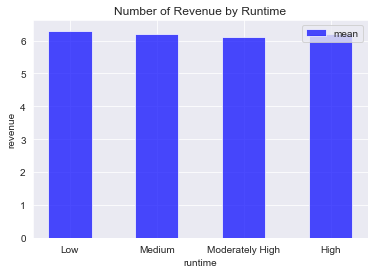

In [239]:
intt = np.arange(len(result_mean)) 
width = 0.5 

bars = plt.bar(intt, result_median, width, color='b', alpha=.7, label='mean')

plt.ylabel('revenue')
plt.xlabel('runtime')
plt.title('Number of Revenue by Runtime')
locations = intt 
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

In [240]:
# question two, is there any association between release year and runtime ?
df = cut_into_quantile(df,'release_year')
df.head(4)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,release_year_levels
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High,High
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,High,High
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,High,High
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,High,High


In [160]:
Y_mean = df.groupby('release_year').mean()['runtime']
Y_mean.tail()

release_year
2011    106.170854
2012    107.196203
2013    109.138889
2014    109.296970
2015    110.868750
Name: runtime, dtype: float64

In [161]:
Y_median = df.groupby('release_year').median()['runtime']
Y_median.tail()

release_year
2011    105.0
2012    102.0
2013    105.5
2014    106.0
2015    110.0
Name: runtime, dtype: float64

In [241]:
index_mean = Y_mean.index
index_median = Y_median.index

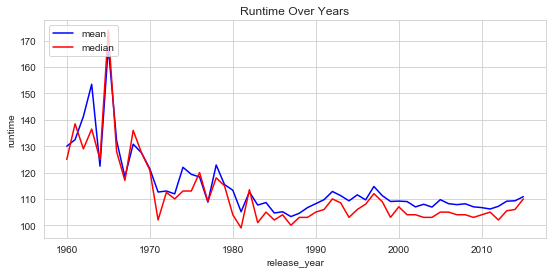

In [242]:
sns.set_style('whitegrid')
x1, y1 = index_mean, Y_mean
x2, y2 = index_median, Y_median
plt.figure(figsize=(9, 4))
plt.plot(x1, y1, color = 'b', label = 'mean')
plt.plot(x2, y2, color = 'r', label = 'median')
plt.title('Runtime Over Years')
plt.xlabel('release_year')
plt.ylabel('runtime');
plt.legend(loc='upper left')

In [247]:
# question three, is there any association between release year and revenue?
movie_count = df.groupby('release_year').count()['revenue']
movie_count.head()

release_year
1960     5
1961    10
1962     7
1963     6
1964     7
Name: revenue, dtype: int64

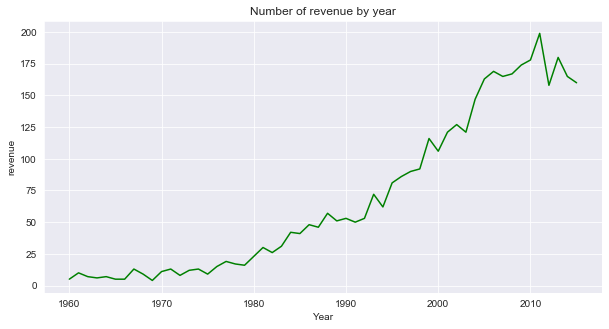

In [248]:
sns.set_style('darkgrid')
x = movie_count.index
y = movie_count
plt.figure(figsize=(10, 5))
plt.plot(x, y, color = 'g', label = 'mean')
plt.title('Number of revenue by year')
plt.xlabel('Year')
plt.ylabel('revenue');

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


# <a id='conclusions'></a>
## Conclusions
Part one: The Key that Affect of the Success  Movie?
At part one, I explored some questions of The Key that Affect of the Success Movie. The result turned out that there is no significant between the budget and vote average , but the cast it's maybe have more affectation on vote average , it's same with director , genres and keywords


Part two: Evaluating the  Movie base on release date , runtime , revenue
At part two, I explored some questions  Evaluating the  Movie base on release date , runtime , revenue. The result turned out that  it's have increase relations between ' Runtime and Revenue ' , second there the a relationship between ' Runtime and Release year ' , also is there positive relationship between ' Release year and Revenue '


## Cleaning Decision Summary

1-drop duplicates
2-get the name of index which column budget have zero
3-get the name of index which column revenue have zero
4-drop null value


## Limitation

1- how to compare the string value ( cast ) with float value (vote average )
3-The categorical data, when I analyses them, I just split them one by one, and count them one by one. But the thing is, there must be some effect when these words combine
4- make a visualization of string values



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])